In [1]:
# /home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/predict/up_train_80_test_20_obb_v1__1120_100/images/labels

#Ground Truth
# /home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/up_10803_v1/test/labels

In [1]:
from glob import glob
import numpy as np
import pandas as pd
import os
from garuda.od import ConfusionMatrix

In [2]:
predicted_path = '/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/predict/up_train_80_test_20_obb_v1__1120_100/images/labels'
ground_truth_path = '/home/rishabh.mondal/Brick-Kilns-project/albk_rishabh/albk_v2/YOLO_LOCALIZATION/processed_data/up_10803_v1/test/labels'

fcbk = 0
zigzag = 0

prediction = []
ground_truth = []
predicted_labels = glob(predicted_path+'/*')
for label in predicted_labels:
    filename = os.path.basename(label)
    # print(filename)
    predicted_label_txt = np.loadtxt(label, ndmin = 2)
    zigzag += np.sum(np.where(predicted_label_txt[:,0]==1, 1, 0))
    fcbk += np.sum(np.where(predicted_label_txt[:,0]==0, 1, 0))
    # print(predicted_label_txt)
    prediction.append(predicted_label_txt.astype(np.float32))
    ground_truth_label_txt = np.loadtxt(os.path.join(ground_truth_path,filename),ndmin = 2)
    # print(ground_truth_label_txt)
    ground_truth.append(ground_truth_label_txt.astype(np.float32))
    

In [3]:
print(fcbk,zigzag)

0 0


Supervision Confusion matrix

|True fcbk| | | |
|--- |-|-|-|
|True zigzag| | | |
|True bg    | | | |
|  | Pred fcbk|Pred zigzag|Pred bg|

In [5]:
classes = ['FCBK','Zigzag']
conf_threshold = 0.25
iou_threshold = 0.5
cm = ConfusionMatrix.from_tensors(prediction, ground_truth, classes, conf_threshold, iou_threshold)
df = pd.DataFrame(cm.matrix, columns = ['predicted_fcbk','predicted_zigzag','predicted_bg'], index=['true_fcbk','true_zigzag','true_bg'])
print(f'conf_threshold = {conf_threshold}, iou_threshold = {iou_threshold}')
df

conf_threshold = 0.25, iou_threshold = 0.5


,predicted_fcbk,predicted_zigzag,predicted_bg
true_fcbk,1405.0,83.0,28.0
true_zigzag,178.0,930.0,54.0
true_bg,252.0,198.0,0.0


In [6]:
df1 = cm.summary
df1['Overall'] = df1['FCBK']+df1['Zigzag']
df1.loc[['Precision','Recall','F1 Score'],'Overall'] = df1.loc[['Precision','Recall','F1 Score']] /2
print(df1.to_markdown())

|                     |        FCBK |      Zigzag |     Overall |
|:--------------------|------------:|------------:|------------:|
| Actual Positives    | 1516        | 1162        | 2678        |
| Predicted Positives | 1835        | 1211        | 3046        |
| True Positives      | 1405        |  930        | 2335        |
| False Positives     |  430        |  281        |  711        |
| False Negatives     |  111        |  232        |  343        |
| Precision           |    0.765668 |    0.76796  |    0.766814 |
| Recall              |    0.926781 |    0.800344 |    0.863563 |
| F1 Score            |    0.838556 |    0.783818 |    0.811187 |


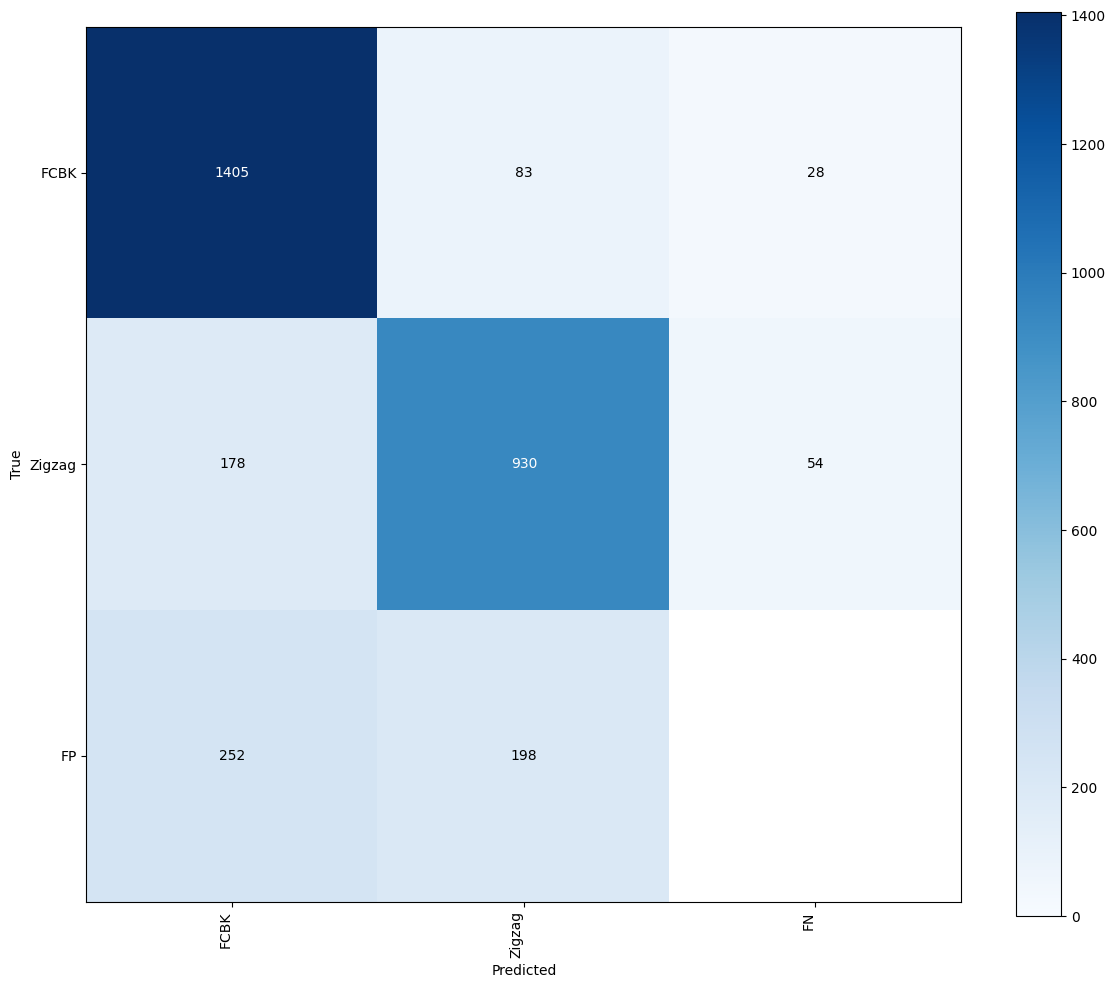

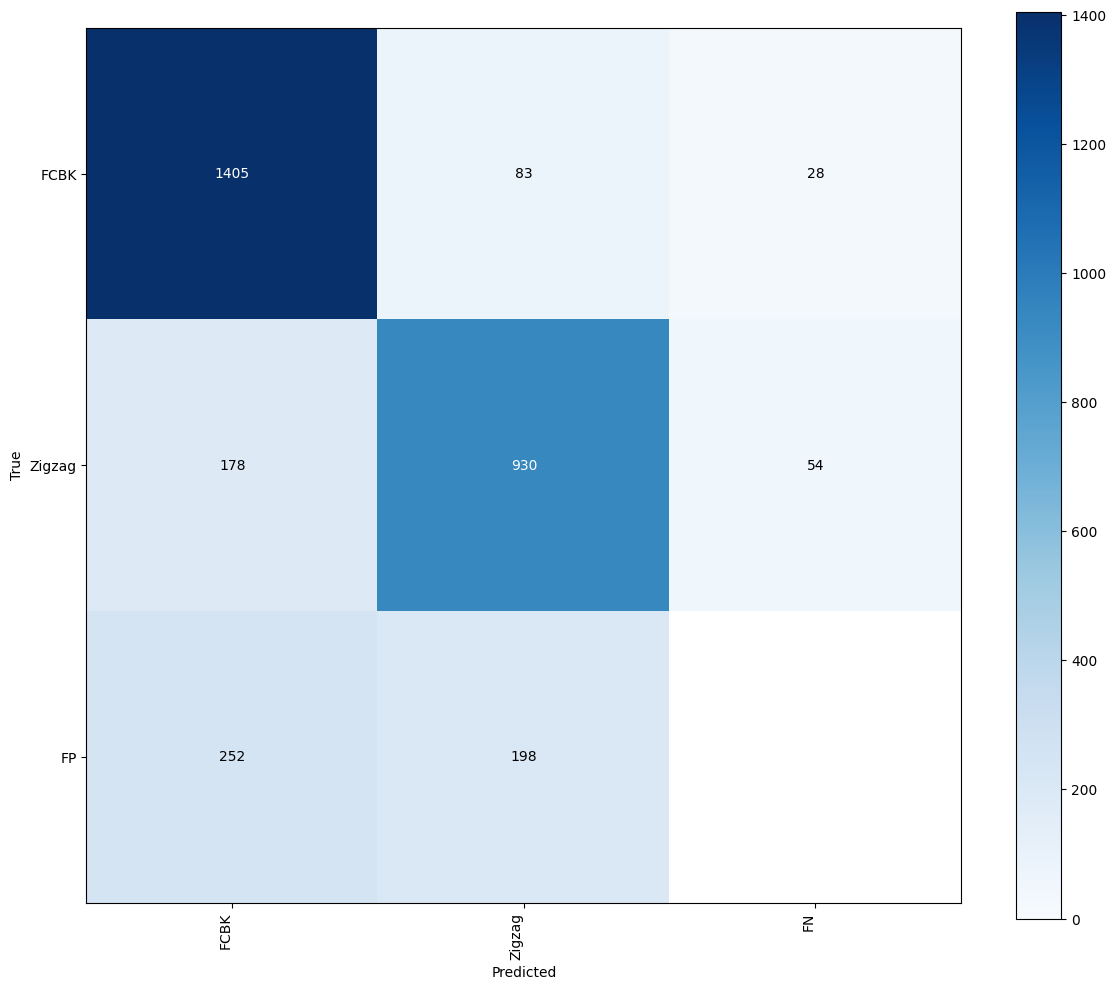

In [8]:
cm.plot()